# Used Cars Price Prediction Model

# Framing the problem
### Business Objective
- To obtain the re-sale value of used car in UK based on different criteria's like the model number, the age of the car, fuel type, mileage etc.
- Predicting the price of used car will help the car dealers understand the optimal value of the car for their dealingslike buying and reselling.

# Data Description
The dataset contains information about used audi cars and their market price It contains columns such as:

- Model : Model of the car
- Year : Registration year of the car
- Price : Price of the car
- tranmission : Type of gearbox used
- fuelType : Type of fuel used
- tax : Tax applied
- mileage : Distance the car has travelled
- mpg : Miles per gallon
- engineSize : Size of the car engine

# Data Acquisition
### Initial Steps
- I am using used car dataset from the UK where the brands of cars are Audi and BMW from two different csv files. I will combine both datasets into one dataframe and make price predictions based on various listed features.
- After combining the total records in the dataset are 21449 and column are 10
- Sample data will be split and the split ration taken is 0.33

In [1]:
# Importing libraries

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Import Data


Import two datasets - audi and bmw - then add new column brand to the dataset and append them together to obtain a single data

In [2]:
import pandas as pd

#audi dataset
df1 = pd.read_csv(r"C:\Users\Gautami Edara\OneDrive - McGill University\McGILL_WINTER_1_TERM\Enterprise ML Prod - 1\archive\audi.csv")

#bmw dataset
df2 = pd.read_csv(r"C:\Users\Gautami Edara\OneDrive - McGill University\McGILL_WINTER_1_TERM\Enterprise ML Prod - 1\archive\bmw.csv")

In [3]:
# combining the two imported datasets

df1["brand"]='audi'
df2["brand"]='bmw'
data = pd.concat([df1,df2])

### Structure of the Data

In [4]:
data=data.reset_index()

In [5]:
data

,index,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,brand
0,0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500,audi
1,1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500,audi
2,2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000,audi
3,3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800,audi
4,4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300,audi
...,...,...,...,...,...,...,...,...,...,...,...
21444,10776,X3,2016,Automatic,40818,Diesel,150,54.3,2.0,19000,bmw
21445,10777,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0,14600,bmw
21446,10778,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0,13100,bmw
21447,10779,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0,9930,bmw


In [6]:
#checking first 5 rows of dataset

data.head()

,index,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,brand
0,0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500,audi
1,1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500,audi
2,2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000,audi
3,3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800,audi
4,4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300,audi


In [7]:
#checking last 5 rows of dataset

data.tail()

,index,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,brand
21444,10776,X3,2016,Automatic,40818,Diesel,150,54.3,2.0,19000,bmw
21445,10777,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0,14600,bmw
21446,10778,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0,13100,bmw
21447,10779,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0,9930,bmw
21448,10780,X1,2017,Automatic,59432,Diesel,125,57.6,2.0,15981,bmw


In [8]:
#rows and columns present in dataset

data.shape

(21449, 11)

In [9]:
#getting the info of the imported dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21449 entries, 0 to 21448
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         21449 non-null  int64  
 1   model         21449 non-null  object 
 2   year          21449 non-null  int64  
 3   transmission  21449 non-null  object 
 4   mileage       21449 non-null  int64  
 5   fuelType      21449 non-null  object 
 6   tax           21449 non-null  int64  
 7   mpg           21449 non-null  float64
 8   engineSize    21449 non-null  float64
 9   price         21449 non-null  int64  
 10  brand         21449 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 1.8+ MB


In [10]:
#get number of counts of different types of vehicles
data["transmission"].value_counts()

Semi-Auto    8257
Manual       6896
Automatic    6296
Name: transmission, dtype: int64

In [11]:
#get number of counts of different models and brands of vehicles
data[["model","brand"]].value_counts()

model      brand
 3 Series  bmw      2443
 1 Series  bmw      1969
 A3        audi     1929
 Q3        audi     1417
 A4        audi     1381
 A1        audi     1347
 2 Series  bmw      1229
 5 Series  bmw      1056
 4 Series  bmw       995
 A5        audi      882
 Q5        audi      877
 Q2        audi      822
 X1        bmw       804
 A6        audi      748
 X3        bmw       551
 X5        bmw       468
 Q7        audi      397
 TT        audi      336
 X2        bmw       288
 X4        bmw       179
 M4        bmw       125
 A7        audi      122
 A8        audi      118
 Z4        bmw       108
 6 Series  bmw       108
 X6        bmw       106
 7 Series  bmw       106
 Q8        audi       69
 X7        bmw        55
 i3        bmw        43
 RS6       audi       39
 8 Series  bmw        39
 RS3       audi       33
 RS4       audi       31
 M5        bmw        29
 RS5       audi       29
 R8        audi       28
 M3        bmw        27
 M2        bmw        21
 S3     

In [12]:
#get the distribution of data - mean, standard deviation, and quartiles
data.describe()

,index,year,mileage,tax,mpg,engineSize,price
count,21449.000000,21449.000000,21449.000000,21449.000000,21449.000000,21449.000000,21449.000000
mean,5361.898830,2017.089748,25163.879482,128.871742,53.599357,2.049862,22814.616859
std,3096.226411,2.260541,24344.055843,64.449164,24.184516,0.589948,11565.383353
min,0.000000,1996.000000,1.000000,0.000000,5.500000,0.000000,1200.000000
25%,2681.000000,2016.000000,5685.000000,125.000000,42.800000,1.600000,14995.000000
50%,5362.000000,2017.000000,18760.000000,145.000000,51.400000,2.000000,20387.000000
75%,8043.000000,2019.000000,37235.000000,145.000000,60.100000,2.000000,27980.000000
max,10780.000000,2020.000000,323000.000000,580.000000,470.800000,6.600000,145000.000000


In [13]:
#Taking copy of the data
data_1 = data.copy()

#getting age of the car from counted from the year it was bought to 2021
data_1['age'] = data_1['year'] 
data_1['age'] = 2021 - data_1['age']

In [14]:
#top rows of the dataset
data_1.head()

,index,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,brand,age
0,0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500,audi,4
1,1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500,audi,5
2,2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000,audi,5
3,3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800,audi,4
4,4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300,audi,2


# Data Exploration

Saving figure attribute_histogram_plots


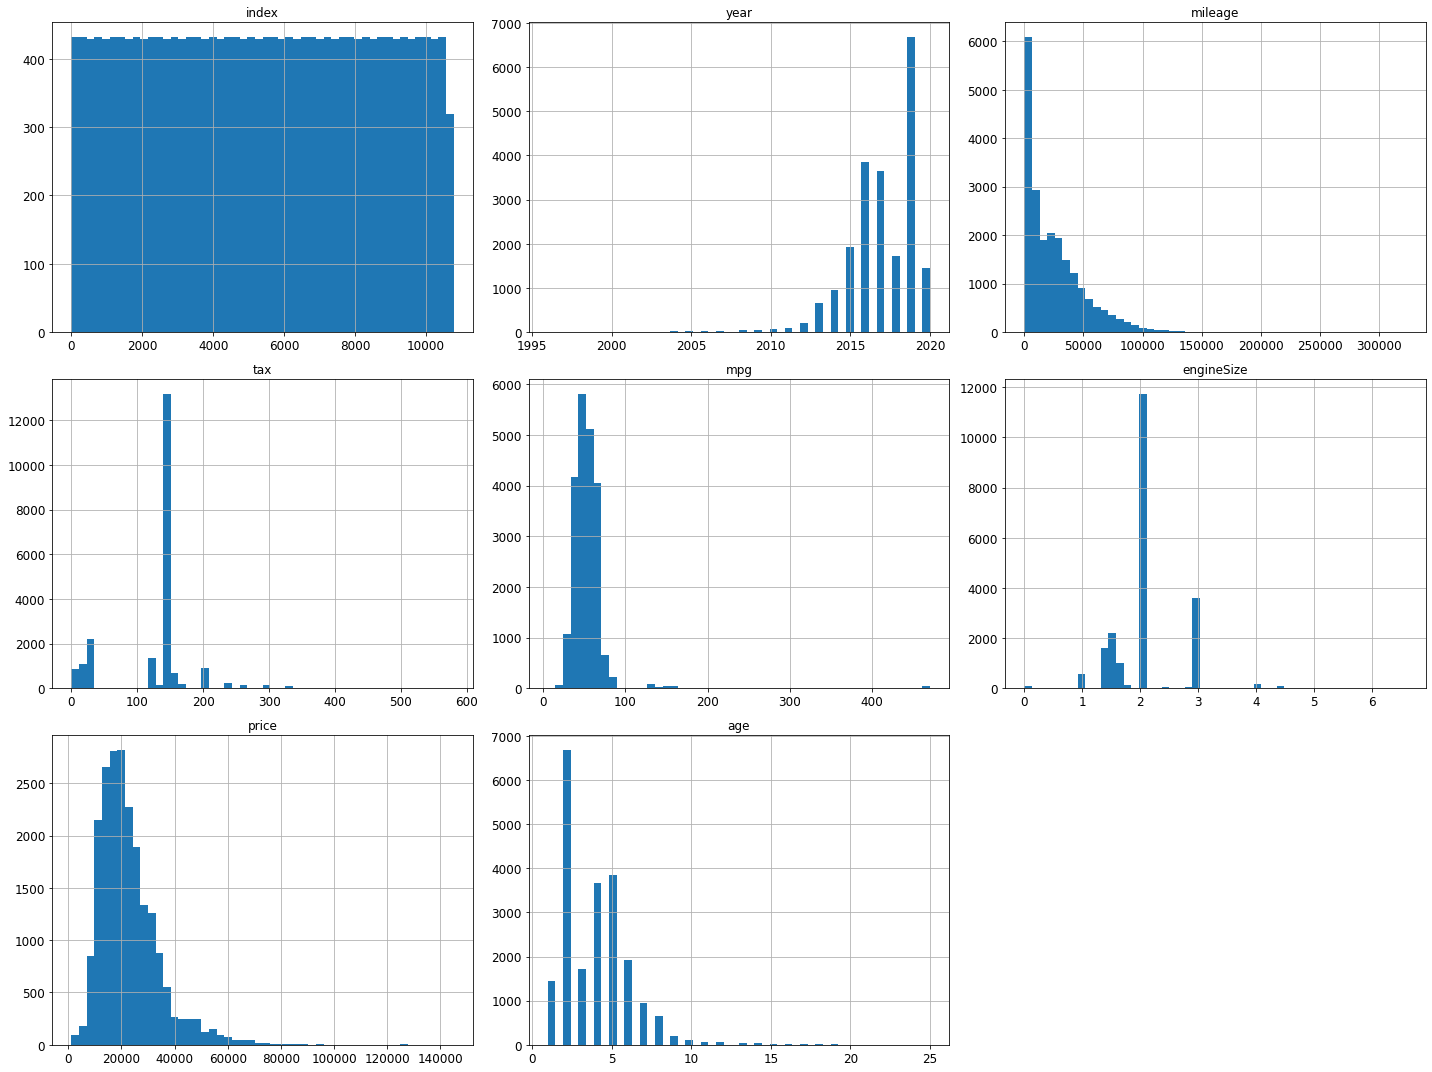

In [15]:
#distribution of the continuous attributes using histogram 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
data_1.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

#### Total sales for each brand type
    ~ Analysis based on below graph
        - Audi and BMW both have almost same number of sales

Text(0.5, 1.0, 'comparing total sales of car brands')

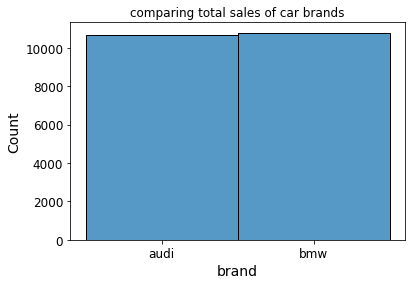

In [16]:
sns.histplot(data_1['brand'].astype('str').sort_values()).set_title("comparing total sales of car brands")

In [17]:
# #profiling of dataset 

# import pandas as pd
# from pandas_profiling import ProfileReport
# data_1.reset_index(drop=True, inplace=True)
# profile = ProfileReport(data_1)
# profile.to_file("usedCars.html")

#### Number of cars in each fuel type  
    ~ Analysis based on below graph
        - Diesel has maximum number of cars
        - Petrol has second highest number of cars
        - Hybris has minimum number of cars

Text(0.5, 1.0, 'Frequency of different fuel type cars')

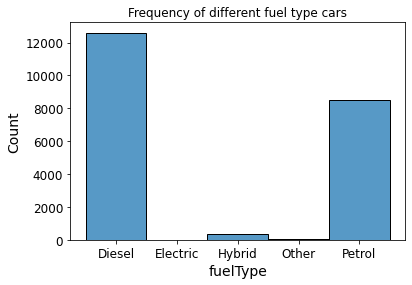

In [18]:
sns.histplot(data_1['fuelType'].astype('str').sort_values()).set_title('Frequency of different fuel type cars')

#### Number of cars in each transmission type  
    ~ Analysis based on below graph
        - Semi-Automatic transmission has maximum number of cars
        - Manual transmission has second highest number of cars
        - Automatic transmission has minimum number of cars

Text(0.5, 1.0, 'Frequency of different transmission type cars')

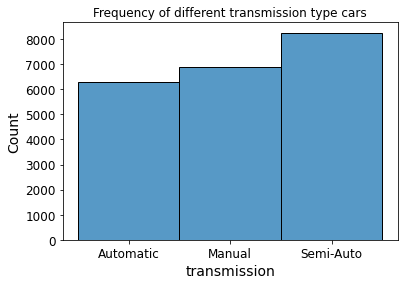

In [19]:
sns.histplot(data_1['transmission'].astype('str').sort_values()).set_title('Frequency of different transmission type cars')

#### Number of cars in each engine type   
    ~ Analysis based on below graph
        - engine size as 2.0 has maximum demand
        - engine size as 3.0 has second highest demand

Text(0.5, 1.0, 'Frequency of cars for different engine size')

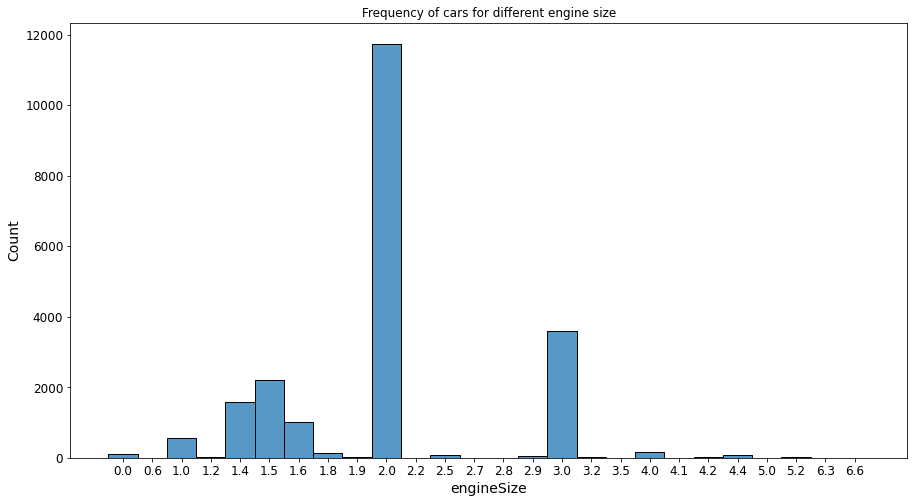

In [20]:
import seaborn as sns
plt.figure(figsize = (15,8))
sns.histplot(data_1['engineSize'].astype('str').sort_values()).set_title('Frequency of cars for different engine size')

#### sales in each year
    ~ Analysis bases on below graph
        - year 2019 has maximum number of sales
        - year 2016, 2017 has second and third highest respectively

Text(0.5, 1.0, 'Number of sales per year')

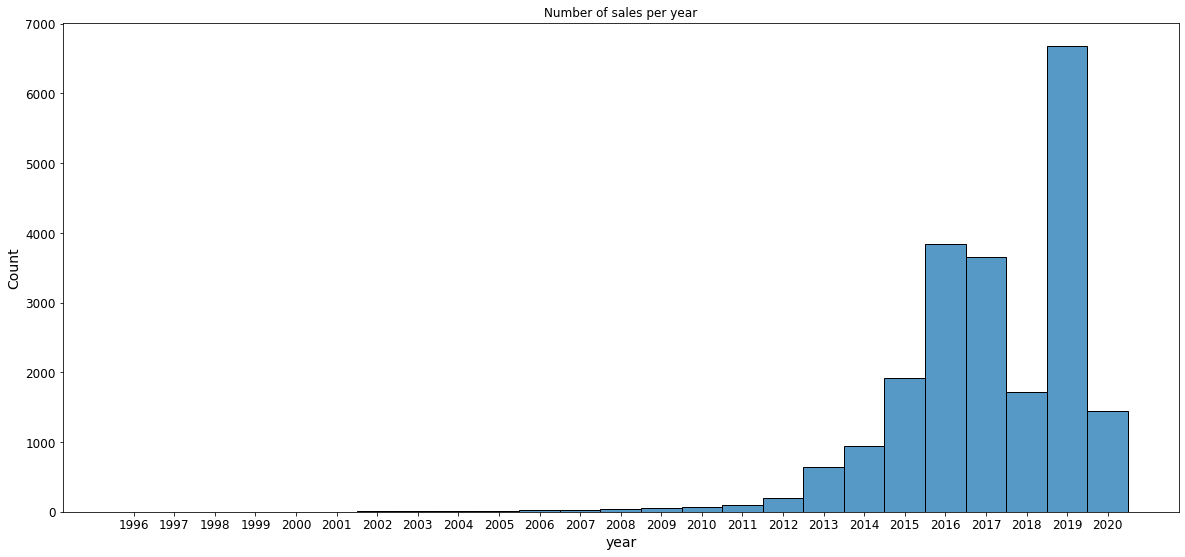

In [21]:
plt.figure(figsize = (20,9))
sns.histplot(data_1['year'].astype('str').sort_values()).set_title('Number of sales per year')

#### check which fuel type car is more expensive
    ~ Analysis bases on below graph
        - Petrol cars have maximum price
        - In petrol cars semi-automatic has maximum price

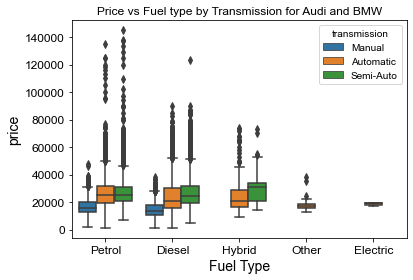

In [22]:
sns.boxplot(x='fuelType', y='price', data=data_1, hue='transmission');
sns.set(rc = {'figure.figsize':(25,10)})
plt.xlabel('Fuel Type');
plt.title('Price vs Fuel type by Transmission for Audi and BMW');

#### Car's age vs Price of the car   
    ~ Analysis based on below graph
        - Lesser the age of the car more expensive it is

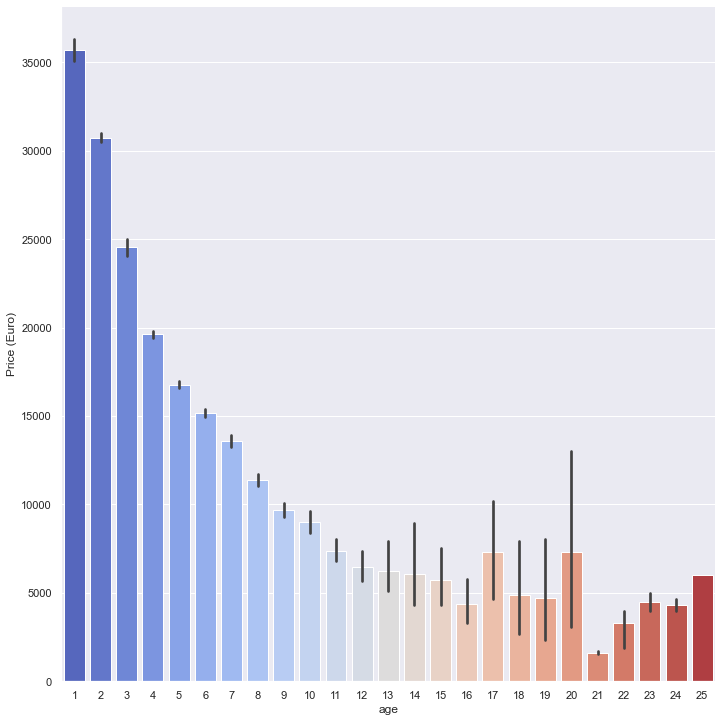

In [23]:
plot1 = sns.catplot( x = "age", y = "price", data = data_1, kind = "bar", height = 10 , palette= "coolwarm")
plot1.set_ylabels("Price (Euro)")
plot1.set_titles("Comparison of Car Age vs Price")
plt.show()

#### Distribution and range of price of the cars
    ~ Analysis based on below graph
        - The distribution almost represents a normal distribution curve 

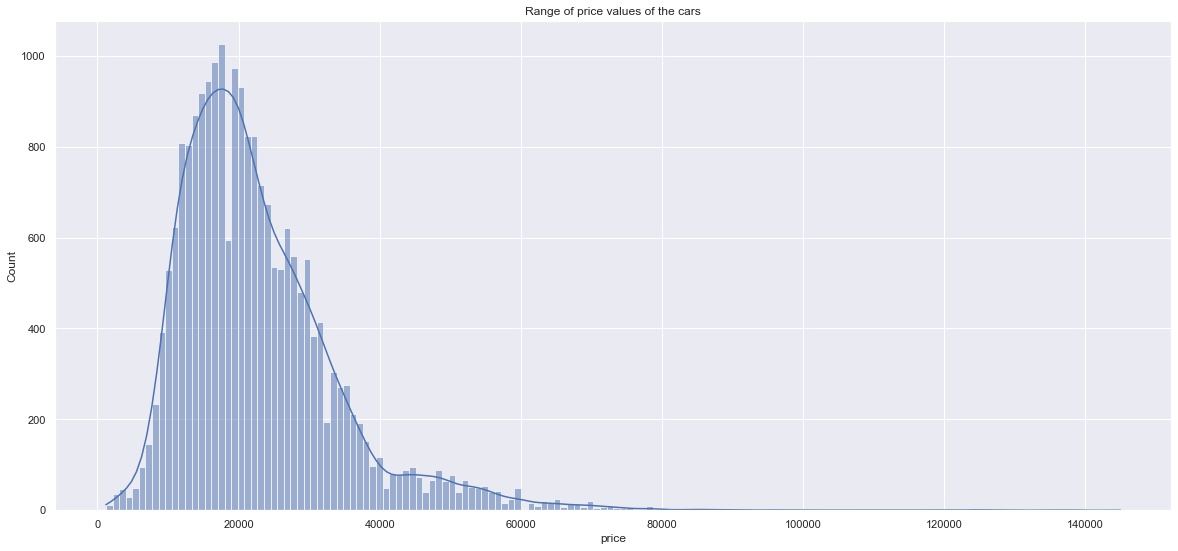

In [24]:
sns.set_theme(); np.random.seed(100)
plt.figure(figsize = (20,9))
ax = sns.histplot(data_1['price'],kde=True).set_title("Range of price values of the cars")

#### Correlation
    ~ Analysis based on below table and graph
        - Non of the columns are highly correlated (All the absolute corr values are less than 0.85)

In [25]:
corr = data_1.corr()
corr

,index,year,mileage,tax,mpg,engineSize,price,age
index,1.000000,-0.229869,0.260700,-0.045299,0.050670,-0.012015,-0.150273,0.229869
year,-0.229869,1.000000,-0.781387,0.058604,-0.138822,-0.029231,0.607830,-1.000000
mileage,0.260700,-0.781387,1.000000,-0.167341,0.182974,0.036234,-0.570697,0.781387
tax,-0.045299,0.058604,-0.167341,1.000000,-0.390023,0.409957,0.311439,-0.058604
mpg,0.050670,-0.138822,0.182974,-0.390023,1.000000,-0.319805,-0.294462,0.138822
engineSize,-0.012015,-0.029231,0.036234,0.409957,-0.319805,1.000000,0.516647,0.029231
price,-0.150273,0.607830,-0.570697,0.311439,-0.294462,0.516647,1.000000,-0.607830
age,0.229869,-1.000000,0.781387,-0.058604,0.138822,0.029231,-0.607830,1.000000


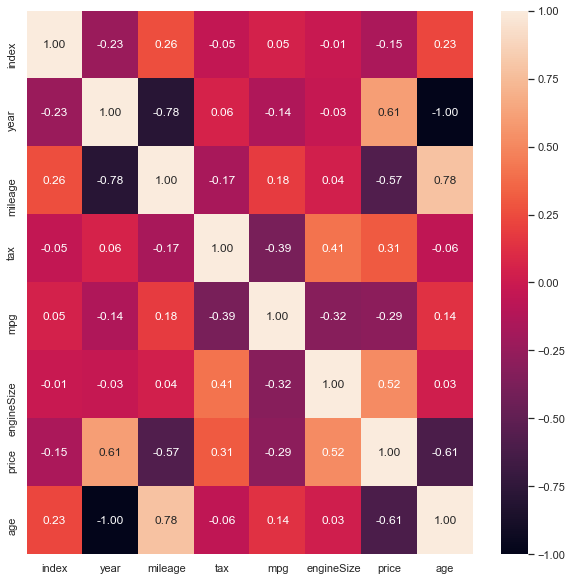

In [26]:
plt.subplots(figsize=(10,10))
sns.heatmap(data_1.corr(), annot = True, fmt = ".2f");

# Prepare the Data for Machine Learning Algorithms

#### Checking for null's, nan's, duplicates 

In [27]:
#check for null values in data frame
data_1.isnull().sum()

#checking whether data frame contains nan values
data_1.isna().sum()


#Check for duplicates
data_1.duplicated().sum()

#drop duplicate records
data_1=data_1.drop_duplicates()
data_1.shape

# Check if any car age is smaller than zero
data_1[data_1["age"] < 0].shape[0]


0

In [28]:
data_1=data_1.reset_index()
data_1

,level_0,index,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,brand,age
0,0,0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500,audi,4
1,1,1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500,audi,5
2,2,2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000,audi,5
3,3,3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800,audi,4
4,4,4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300,audi,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21444,21444,10776,X3,2016,Automatic,40818,Diesel,150,54.3,2.0,19000,bmw,5
21445,21445,10777,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0,14600,bmw,5
21446,21446,10778,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0,13100,bmw,4
21447,21447,10779,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0,9930,bmw,7


#### Outliers Detection
    ~ Analysis based on below box plot graphs
        - There are outliers present in continuous variables which would be removed using Isolation Forest ensemble method

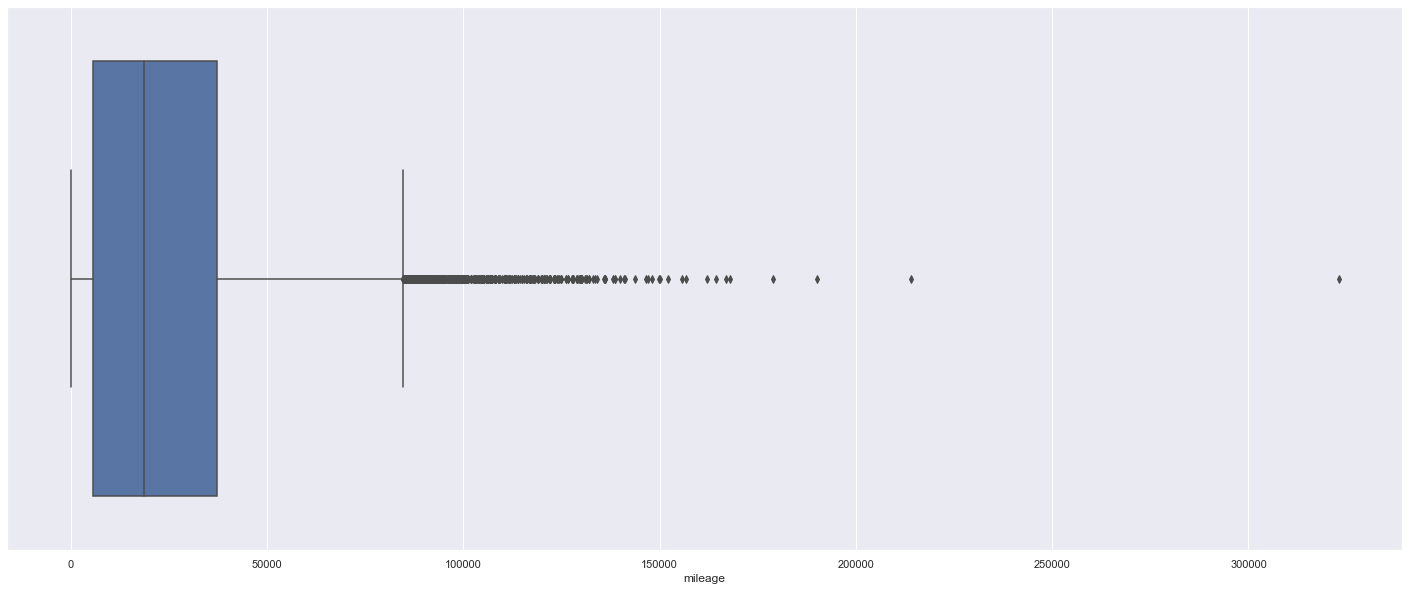

In [29]:
box1 = sns.boxplot(x = 'mileage', data = data_1)
sns.set(rc = {'figure.figsize':(10,5)})

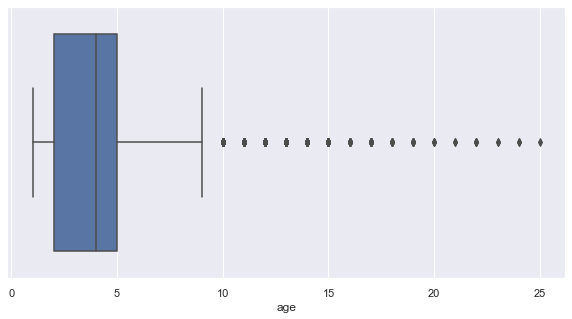

In [30]:
box2 = sns.boxplot(x = 'age', data = data_1)
sns.set(rc = {'figure.figsize':(10,5)})

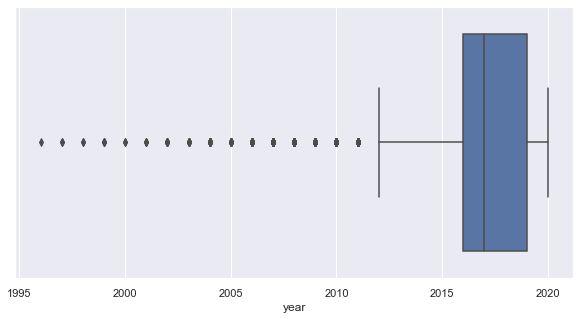

In [31]:
box2 = sns.boxplot(x = 'year', data = data_1)
sns.set(rc = {'figure.figsize':(10,5)})

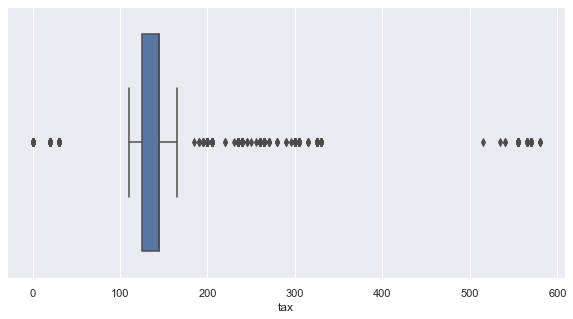

In [32]:
box2 = sns.boxplot(x = 'tax', data = data_1)
sns.set(rc = {'figure.figsize':(10,5)})

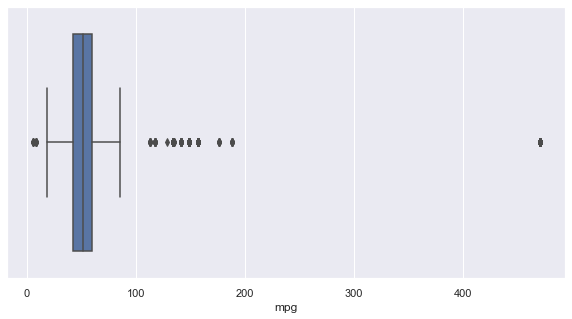

In [33]:
box2 = sns.boxplot(x = 'mpg', data = data_1)
sns.set(rc = {'figure.figsize':(10,5)})

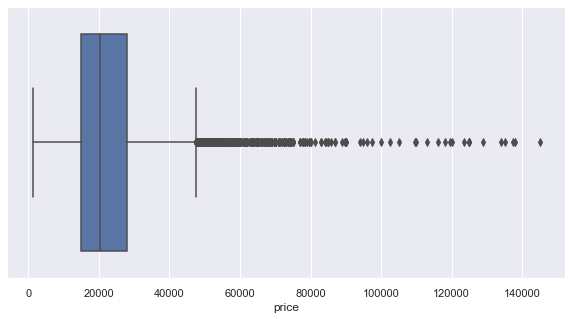

In [34]:
box2 = sns.boxplot(x = 'price', data = data_1)
sns.set(rc = {'figure.figsize':(10,5)})

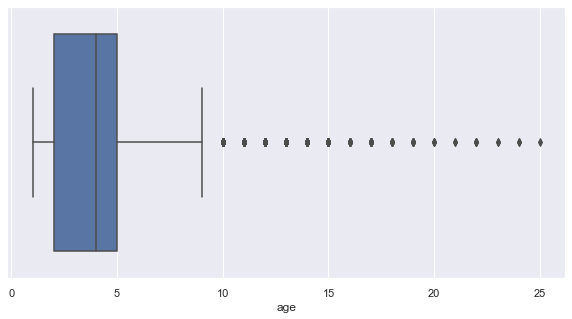

In [35]:
box2 = sns.boxplot(x = 'age', data = data_1)
sns.set(rc = {'figure.figsize':(10,5)})

In [36]:
data_1.columns

Index(['level_0', 'index', 'model', 'year', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'price', 'brand', 'age'],
      dtype='object')

data_1

In [37]:
data_numerical=data_1[["year","mileage","tax","mpg","engineSize","price","age"]]
data_numerical

,year,mileage,tax,mpg,engineSize,price,age
0,2017,15735,150,55.4,1.4,12500,4
1,2016,36203,20,64.2,2.0,16500,5
2,2016,29946,30,55.4,1.4,11000,5
3,2017,25952,145,67.3,2.0,16800,4
4,2019,1998,145,49.6,1.0,17300,2
...,...,...,...,...,...,...,...
21444,2016,40818,150,54.3,2.0,19000,5
21445,2016,42947,125,60.1,2.0,14600,5
21446,2017,25468,200,42.8,2.0,13100,4
21447,2014,45000,30,64.2,2.0,9930,7


#### Ensemble Method : Isolation Forest for outlier removal

In [38]:
from sklearn.ensemble import IsolationForest
from numpy import where
import numpy as np
iforest=IsolationForest(contamination=.04)
pred=iforest.fit_predict(data_numerical)
score=iforest.decision_function(data_numerical)
anomaly_index=where(pred==-1)
list_remove=list(data_numerical.iloc[anomaly_index].index)
len(list_remove)
data_numerical.drop(list_remove, inplace=True)

In [39]:
data_numerical

,year,mileage,tax,mpg,engineSize,price,age
0,2017,15735,150,55.4,1.4,12500,4
1,2016,36203,20,64.2,2.0,16500,5
2,2016,29946,30,55.4,1.4,11000,5
3,2017,25952,145,67.3,2.0,16800,4
4,2019,1998,145,49.6,1.0,17300,2
...,...,...,...,...,...,...,...
21444,2016,40818,150,54.3,2.0,19000,5
21445,2016,42947,125,60.1,2.0,14600,5
21446,2017,25468,200,42.8,2.0,13100,4
21447,2014,45000,30,64.2,2.0,9930,7


In [40]:
data_categorical=data_1[['model', 'transmission', 'fuelType','brand']]

In [41]:
data_categorical

,model,transmission,fuelType,brand
0,A1,Manual,Petrol,audi
1,A6,Automatic,Diesel,audi
2,A1,Manual,Petrol,audi
3,A4,Automatic,Diesel,audi
4,A3,Manual,Petrol,audi
...,...,...,...,...
21444,X3,Automatic,Diesel,bmw
21445,5 Series,Automatic,Diesel,bmw
21446,3 Series,Manual,Petrol,bmw
21447,1 Series,Automatic,Diesel,bmw


In [42]:
df=data_numerical.join(data_categorical)

In [43]:
df.head()

,year,mileage,tax,mpg,engineSize,price,age,model,transmission,fuelType,brand
0,2017,15735,150,55.4,1.4,12500,4,A1,Manual,Petrol,audi
1,2016,36203,20,64.2,2.0,16500,5,A6,Automatic,Diesel,audi
2,2016,29946,30,55.4,1.4,11000,5,A1,Manual,Petrol,audi
3,2017,25952,145,67.3,2.0,16800,4,A4,Automatic,Diesel,audi
4,2019,1998,145,49.6,1.0,17300,2,A3,Manual,Petrol,audi


### Check for categorical variables and encode them using one hot encoding method

In [44]:
df_categorical=df[['model', 'transmission', 'fuelType','brand']]

In [45]:
for col in df_categorical:
    print(col,":",len(data[col].unique()),'labels')

model : 50 labels
transmission : 3 labels
fuelType : 5 labels
brand : 2 labels


#### Coversion of categorical variables using One Hot Encoding with fewer categories

In [46]:
dummy_transmission=pd.get_dummies(df.transmission, prefix="transmission")
df = df.join(dummy_transmission)

dummy_fuelType =pd.get_dummies(df.fuelType, prefix="fuelType")
df = df.join(dummy_fuelType)

dummy_brand =pd.get_dummies(df.brand, prefix="brand")
df = df.join(dummy_brand)

In [47]:
df

,year,mileage,tax,mpg,engineSize,price,age,model,transmission,fuelType,brand,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,brand_audi,brand_bmw
0,2017,15735,150,55.4,1.4,12500,4,A1,Manual,Petrol,audi,0,1,0,0,0,0,1,1,0
1,2016,36203,20,64.2,2.0,16500,5,A6,Automatic,Diesel,audi,1,0,0,1,0,0,0,1,0
2,2016,29946,30,55.4,1.4,11000,5,A1,Manual,Petrol,audi,0,1,0,0,0,0,1,1,0
3,2017,25952,145,67.3,2.0,16800,4,A4,Automatic,Diesel,audi,1,0,0,1,0,0,0,1,0
4,2019,1998,145,49.6,1.0,17300,2,A3,Manual,Petrol,audi,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21444,2016,40818,150,54.3,2.0,19000,5,X3,Automatic,Diesel,bmw,1,0,0,1,0,0,0,0,1
21445,2016,42947,125,60.1,2.0,14600,5,5 Series,Automatic,Diesel,bmw,1,0,0,1,0,0,0,0,1
21446,2017,25468,200,42.8,2.0,13100,4,3 Series,Manual,Petrol,bmw,0,1,0,0,0,0,1,0,1
21447,2014,45000,30,64.2,2.0,9930,7,1 Series,Automatic,Diesel,bmw,1,0,0,1,0,0,0,0,1


#### Coversion of categorical variables using One Hot Encoding with MULTIPLE categories

In [48]:
# Check top most 10 frequent categories for variable model
model_top_10 = [x for x in df.model.value_counts().sort_values(ascending=False).head(10).index]
model_top_10

[' 3 Series',
 ' 1 Series',
 ' A3',
 ' Q3',
 ' A4',
 ' A1',
 ' 2 Series',
 ' 5 Series',
 ' 4 Series',
 ' A5']

In [49]:
for label in model_top_10:
    df["model_"+label] = np.where(df['model']==label,1,0)

In [50]:
df

,year,mileage,tax,mpg,engineSize,price,age,model,transmission,fuelType,...,model_ 3 Series,model_ 1 Series,model_ A3,model_ Q3,model_ A4,model_ A1,model_ 2 Series,model_ 5 Series,model_ 4 Series,model_ A5
0,2017,15735,150,55.4,1.4,12500,4,A1,Manual,Petrol,...,0,0,0,0,0,1,0,0,0,0
1,2016,36203,20,64.2,2.0,16500,5,A6,Automatic,Diesel,...,0,0,0,0,0,0,0,0,0,0
2,2016,29946,30,55.4,1.4,11000,5,A1,Manual,Petrol,...,0,0,0,0,0,1,0,0,0,0
3,2017,25952,145,67.3,2.0,16800,4,A4,Automatic,Diesel,...,0,0,0,0,1,0,0,0,0,0
4,2019,1998,145,49.6,1.0,17300,2,A3,Manual,Petrol,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21444,2016,40818,150,54.3,2.0,19000,5,X3,Automatic,Diesel,...,0,0,0,0,0,0,0,0,0,0
21445,2016,42947,125,60.1,2.0,14600,5,5 Series,Automatic,Diesel,...,0,0,0,0,0,0,0,1,0,0
21446,2017,25468,200,42.8,2.0,13100,4,3 Series,Manual,Petrol,...,1,0,0,0,0,0,0,0,0,0
21447,2014,45000,30,64.2,2.0,9930,7,1 Series,Automatic,Diesel,...,0,1,0,0,0,0,0,0,0,0


In [51]:
# from sklearn import preprocessing
# encoder = preprocessing.LabelEncoder()
# data_1['model'] = encoder.fit_transform(data_1['model'])
# model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
# model_mapping

In [52]:
#drop encoded columns
df=df.drop(columns=['model', 'transmission', 'fuelType','brand'])

In [53]:
df.head()

,year,mileage,tax,mpg,engineSize,price,age,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,...,model_ 3 Series,model_ 1 Series,model_ A3,model_ Q3,model_ A4,model_ A1,model_ 2 Series,model_ 5 Series,model_ 4 Series,model_ A5
0,2017,15735,150,55.4,1.4,12500,4,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2016,36203,20,64.2,2.0,16500,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,29946,30,55.4,1.4,11000,5,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2017,25952,145,67.3,2.0,16800,4,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2019,1998,145,49.6,1.0,17300,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
df_x = df.drop(columns=["price"])
df_y = df["price"]

In [55]:
df_x

,year,mileage,tax,mpg,engineSize,age,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,...,model_ 3 Series,model_ 1 Series,model_ A3,model_ Q3,model_ A4,model_ A1,model_ 2 Series,model_ 5 Series,model_ 4 Series,model_ A5
0,2017,15735,150,55.4,1.4,4,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016,36203,20,64.2,2.0,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,29946,30,55.4,1.4,5,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2017,25952,145,67.3,2.0,4,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2019,1998,145,49.6,1.0,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21444,2016,40818,150,54.3,2.0,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21445,2016,42947,125,60.1,2.0,5,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21446,2017,25468,200,42.8,2.0,4,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
21447,2014,45000,30,64.2,2.0,7,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [56]:
df["price"].max()

89750

### Train-Test Data split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(df_x, df_y, test_size = 0.33, random_state = 100)

In [58]:
df_x.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'age',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'brand_audi', 'brand_bmw',
       'model_ 3 Series', 'model_ 1 Series', 'model_ A3', 'model_ Q3',
       'model_ A4', 'model_ A1', 'model_ 2 Series', 'model_ 5 Series',
       'model_ 4 Series', 'model_ A5'],
      dtype='object')

In [59]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'age']] = sc.fit_transform(X_train[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'age']]) # fit the matrix and tranform the values into the formula
# X_test[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'age']] = sc.transform(X_test[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'age']]) # as its new data it needs to be scaled used in the training test


In [60]:
X_train

,year,mileage,tax,mpg,engineSize,age,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,...,model_ 3 Series,model_ 1 Series,model_ A3,model_ Q3,model_ A4,model_ A1,model_ 2 Series,model_ 5 Series,model_ 4 Series,model_ A5
20701,2018,20000,140,156.9,2.0,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14012,2020,101,150,29.1,3.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3738,2019,6000,145,49.6,1.6,2,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
14805,2019,9257,150,33.6,3.0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
12077,2019,123,145,65.7,2.0,2,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16824,2019,2631,145,34.0,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,2016,16666,30,60.1,2.0,5,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
12571,2019,7947,145,47.1,2.0,2,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
14628,2019,1000,145,52.3,1.5,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# Models

### Linear Regression Model

In [61]:
# Run linear regression based on the training data
from sklearn.linear_model import LinearRegression
import math
lm2 = LinearRegression()
model = lm2.fit(X_train,y_train)

# Generate the prediction value from the training data
y_train_pred = model.predict(X_train)
# Generate the prediction value from the test data
y_test_pred = model.predict(X_test)

# check the SSE between the observed and actual values

from sklearn.metrics import mean_squared_error

# check the SSE between the observed and actual values

mse = mean_squared_error(y_test, y_test_pred)

mse

19017843.633736916

In [62]:
print("Linear Regression Model's MSE - ",mse)

print("Linear Regression Model's RMSE - ",math.sqrt(mse))

Linear Regression Model's MSE -  19017843.633736916
Linear Regression Model's RMSE -  4360.945268372089


### Decision Tree Regression Model

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [64]:
y_pred1 = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_pred1, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


3131.7743390958553

In [65]:

print("Decision Tree Regression Model's MSE - ",mse)

print("Decision Tree Regression Model's RMSE - ",math.sqrt(mse))

Decision Tree Regression Model's MSE -  19017843.633736916
Decision Tree Regression Model's RMSE -  4360.945268372089


### Random Forest Regression Model

In [66]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
y_pred2 = forest_reg.predict(X_test)
RF_mse = mean_squared_error(y_pred2, y_test)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

2412.634712291084

In [68]:
print("Random Forest Tree Regression Model's MSE - ",RF_mse)

print("Random Forest Tree Regression Model's RMSE - ",RF_rmse)

Random Forest Tree Regression Model's MSE -  5820806.254951881
Random Forest Tree Regression Model's RMSE -  2412.634712291084


####   ANALYSIS
When all models which are run above are compared Random Forest Tree Regression has the least RMSE

## Better Evaluation using Cross-Validation

#### Linear Regression Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score

linearRegression_scores = cross_val_score(model, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-linearRegression_scores)
print("Scores for Linear Regression \n")

print("Scores:", linearRegression_scores)
print("Mean:", linearRegression_scores.mean())
print("Standard deviation:", linearRegression_scores.std())

Scores for Linear Regression 

Scores: [-20177859.17839685 -17882069.32129915 -19499425.53627049
 -18804339.27699423 -21750655.1462927  -20789154.53181558
 -19922459.76776989 -20349052.16954767 -21153738.25420246
 -23008539.26835026]
Mean: -20333729.24509393
Standard deviation: 1388579.1379864335


#### Descision Tree Regression Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_reg_scores)

print("Scores for Descision Tree Regressor \n")

print("Scores:", tree_reg_scores)
print("Mean:", tree_reg_scores.mean())
print("Standard deviation:", tree_reg_scores.std())

Scores for Descision Tree Regressor 

Scores: [-10537782.69421903 -11355616.39593079  -9675572.09230515
 -10298408.43072746  -9868298.72187604 -11552302.20926429
 -10512211.00408428  -9621869.90315715  -9683450.79214004
 -12641027.70830312]
Mean: -10574653.995200735
Standard deviation: 944801.3320983397


#### Random Forest Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-forest_scores)

print("Scores for Random Forest Tree Regressor \n")

print("Scores:", forest_scores)
print("Mean:", forest_scores.mean())
print("Standard deviation:", forest_scores.std())

Scores for Random Forest Tree Regressor 

Scores: [-5961787.17246227 -5877823.30834286 -6024670.29890341 -5379504.61157737
 -6055143.58755107 -6666428.19018445 -6462961.27010783 -6358659.87532806
 -5672450.44534805 -7616492.38140183]
Mean: -6207592.11412072
Standard deviation: 590045.7082308894


In [72]:
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count      10.000000
mean     4506.667320
std       162.203273
min      4228.719584
25%      4427.726109
50%      4501.484786
75%      4589.367627
max      4796.721721
dtype: float64

#### ANALYSIS
When all models which are run above are compared Random Forest Tree Regression has the least RMSE 

## Fine Tuning Model

### Grid Search

To find the optimal parameter for Random Forest Model

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 60, 100], 'max_features': [10, 20, 30, 40]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [60, 100], 'max_features': [20, 30, 40]},
  ]

RF_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(RF_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [10, 20, 30, 40],
                          'n_estimators': [30, 60, 100]},
                         {'bootstrap': [False], 'max_features': [20, 30, 40],
                          'n_estimators': [60, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 100}

In [75]:
grid_search.best_estimator_

RandomForestRegressor(max_features=10, random_state=42)

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2518.934628732392 {'max_features': 10, 'n_estimators': 30}
2495.0980636738395 {'max_features': 10, 'n_estimators': 60}
2490.3417984139905 {'max_features': 10, 'n_estimators': 100}
2515.1866642476343 {'max_features': 20, 'n_estimators': 30}
2502.8155463162257 {'max_features': 20, 'n_estimators': 60}
2498.0714337006343 {'max_features': 20, 'n_estimators': 100}
nan {'max_features': 30, 'n_estimators': 30}
nan {'max_features': 30, 'n_estimators': 60}
nan {'max_features': 30, 'n_estimators': 100}
nan {'max_features': 40, 'n_estimators': 30}
nan {'max_features': 40, 'n_estimators': 60}
nan {'max_features': 40, 'n_estimators': 100}
2758.982523692732 {'bootstrap': False, 'max_features': 20, 'n_estimators': 60}
2756.555867624909 {'bootstrap': False, 'max_features': 20, 'n_estimators': 100}
nan {'bootstrap': False, 'max_features': 30, 'n_estimators': 60}
nan {'bootstrap': False, 'max_features': 30, 'n_estimators': 100}
nan {'bootstrap': False, 'max_features': 40, 'n_estimators': 60}
nan {'bootst

In [77]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.732189,0.116992,0.032489,0.003723,10,30,NaN,"{'max_features': 10, 'n_estimators': 30}",-5.971915e+06,-6.068325e+06,...,-6.345032e+06,295390.990095,6,-1.044179e+06,-1.072021e+06,-1.044922e+06,-1.042486e+06,-1.021317e+06,-1.044985e+06,16112.116300
1,1.426462,0.131144,0.055054,0.008391,10,60,NaN,"{'max_features': 10, 'n_estimators': 60}",-5.922688e+06,-5.839165e+06,...,-6.225514e+06,303646.915481,2,-9.687353e+05,-1.018468e+06,-1.002112e+06,-9.904149e+05,-9.657482e+05,-9.890956e+05,19967.698592
2,2.151525,0.024840,0.080904,0.002652,10,100,NaN,"{'max_features': 10, 'n_estimators': 100}",-5.931313e+06,-5.832250e+06,...,-6.201802e+06,278464.052564,1,-9.456640e+05,-9.839243e+05,-9.805122e+05,-9.644616e+05,-9.361202e+05,-9.621365e+05,18793.456467
3,1.065662,0.039460,0.030380,0.002282,20,30,NaN,"{'max_features': 20, 'n_estimators': 30}",-6.122413e+06,-6.027226e+06,...,-6.326164e+06,222685.532712,5,-1.044899e+06,-1.090858e+06,-1.046094e+06,-1.057301e+06,-1.014208e+06,-1.050672e+06,24668.875603
4,2.178406,0.040548,0.054134,0.005393,20,60,NaN,"{'max_features': 20, 'n_estimators': 60}",-5.996920e+06,-6.018511e+06,...,-6.264086e+06,227210.081480,4,-9.748142e+05,-1.045770e+06,-1.001158e+06,-1.012307e+06,-9.557493e+05,-9.979596e+05,31046.168687
5,3.614057,0.137178,0.083989,0.005521,20,100,NaN,"{'max_features': 20, 'n_estimators': 100}",-5.961102e+06,-5.987529e+06,...,-6.240361e+06,225285.941922,3,-9.516789e+05,-1.013764e+06,-9.766439e+05,-9.855997e+05,-9.314522e+05,-9.718276e+05,28311.240250
6,0.020812,0.002533,0.000000,0.000000,30,30,NaN,"{'max_features': 30, 'n_estimators': 30}",NaN,NaN,...,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.030996,0.001838,0.000000,0.000000,30,60,NaN,"{'max_features': 30, 'n_estimators': 60}",NaN,NaN,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.043328,0.000741,0.000000,0.000000,30,100,NaN,"{'max_features': 30, 'n_estimators': 100}",NaN,NaN,...,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.021185,0.002113,0.000000,0.000000,40,30,NaN,"{'max_features': 40, 'n_estimators': 30}",NaN,NaN,...,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Randomized Search

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=65),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E49DFFDB50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E49E6F1280>},
                   random_state=42, scoring='neg_mean_squared_error')

In [79]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 39, 'n_estimators': 180}
nan {'max_features': 29, 'n_estimators': 15}
nan {'max_features': 43, 'n_estimators': 72}
nan {'max_features': 61, 'n_estimators': 21}
nan {'max_features': 39, 'n_estimators': 122}
2500.698674058674 {'max_features': 19, 'n_estimators': 75}
2489.5099011081093 {'max_features': 11, 'n_estimators': 88}
nan {'max_features': 53, 'n_estimators': 100}
nan {'max_features': 40, 'n_estimators': 152}
2553.734495539832 {'max_features': 3, 'n_estimators': 150}


In [80]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

sorted(zip(feature_importances,X_train.columns), reverse=True)

[(0.2307180235514093, 'mpg'),
 (0.16909419148663854, 'engineSize'),
 (0.16903478984442746, 'year'),
 (0.16614202565095, 'age'),
 (0.09957062967233107, 'mileage'),
 (0.05062461122391601, 'tax'),
 (0.025860548313510832, 'transmission_Manual'),
 (0.017418481193411432, 'fuelType_Petrol'),
 (0.015420408471323262, 'fuelType_Diesel'),
 (0.009034998538305949, 'model_ 1 Series'),
 (0.006065015042649175, 'model_ 2 Series'),
 (0.005884618589173347, 'brand_audi'),
 (0.005509505435176582, 'brand_bmw'),
 (0.00528891735801267, 'transmission_Semi-Auto'),
 (0.004333944285841296, 'model_ 3 Series'),
 (0.0035544938436798935, 'model_ 4 Series'),
 (0.0029447980833445884, 'transmission_Automatic'),
 (0.0027441421005956904, 'model_ Q3'),
 (0.0025844227528614384, 'model_ A1'),
 (0.002246440887183267, 'model_ 5 Series'),
 (0.002038323980449625, 'model_ A4'),
 (0.0018936439244649562, 'model_ A3'),
 (0.0010114583734837576, 'model_ A5'),
 (0.000920591484957096, 'fuelType_Hybrid'),
 (6.0975911902606254e-05, 'fuelT

# Final Model
#### Best Fit Model and its Parameters
        - RMSE is least in Random Forest
        - Best Parameters are used from CV Search as it gives least RMSE

In [81]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_features=10)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=10, random_state=42)

In [82]:
final_predictions = forest_reg.predict(X_test)
RF_mse = mean_squared_error(final_predictions, y_test)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

2387.329291009035

#### Random Forest Model's RMSE with optimal parameter

In [83]:
print("Random Forest Tree Regression Model's MSE - ",RF_rmse)

Random Forest Tree Regression Model's MSE -  2387.329291009035


We can compute a 95% confidence interval for the test RMSE:

In [84]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2291.82438302, 2479.15777732])

In [85]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(2291.8243830165457, 2479.157777316775)

Analysing the above results the least RMSE value is obtained using Grid Search is better than the Random Search

# ~Final Results

    - The final model used was Random Forest where the optimal parameters were picked using grid search and the RMSE of the model is 2387.33. The confidence interval is (2291.8243830165457, 2479.157777316775)